In [1]:
import random
import json

ROOM_WIDTH = 30  # Room width in feet
ROOM_HEIGHT = 40  # Room height in feet


class Furniture:
    def __init__(self, name, x, y, width, height, orientation):
        self.name = name
        # Ensure furniture is within room
        self.x = min(max(x, width / 2), ROOM_WIDTH - width / 2)
        self.y = min(max(y, height / 2), ROOM_HEIGHT - height / 2)
        self.width = width
        self.height = height
        self.orientation = orientation  # Furniture orientation (0, 90, 180, 270 degrees only)
        self.interact_position = self.get_interact_position()

    def get_interact_position(self):
        if self.orientation == 0:
            return self.x, self.y - self.height / 2  # Interaction on the top
        elif self.orientation == 90:
            return self.x + self.width / 2, self.y  # Interaction on the right
        elif self.orientation == 180:
            return self.x, self.y + self.height / 2  # Interaction on the bottom
        else:
            return self.x - self.width / 2, self.y  # Interaction on the left


class Person:
    def __init__(self, name, initial_x, initial_y, furniture_list):
        self.name = name
        # Ensure person starts within room boundaries
        self.x = min(max(initial_x, 0), ROOM_WIDTH)
        self.y = min(max(initial_y, 0), ROOM_HEIGHT)
        self.furniture_list = furniture_list
        self.activities = []
        self.full_path = []
        self.current_time = 0  # Time starts from 00:00 in seconds
        self.generate_daily_schedule()

    def generate_daily_schedule(self):
        activities = [
            ("sleep", "bed", 8 * 60),
            ("work", "desk", 4 * 60),
            ("relax", "tv", 2 * 60),
            ("read", "wardrobe", 1 * 60),
        ]

        # Move to the first activity's furniture
        first_activity, first_furniture_name, _ = activities[0]
        first_furniture = next(f for f in self.furniture_list if f.name == first_furniture_name)
        path_to_first = self.move_to_furniture(first_furniture, "walking")
        self.full_path += path_to_first

        for activity, furniture_name, duration in activities:
            duration_variation = random.randint(-10, 10)  # time variation
            duration += duration_variation
            furniture = next(f for f in self.furniture_list if f.name == furniture_name)

            path_to_furniture = self.move_to_furniture(furniture, "walking")

            # Random position offset
            interact_x, interact_y = furniture.interact_position
            interact_x += random.uniform(-1, 1)
            interact_y += random.uniform(-1, 1)

            interact_x = min(max(interact_x, 0), ROOM_WIDTH)
            interact_y = min(max(interact_y, 0), ROOM_HEIGHT)

            static_path = self.generate_static_path(interact_x, interact_y, duration, activity)

            self.full_path += path_to_furniture + static_path  # Update the full path

    def move_to_furniture(self, furniture, status):
        target_x, target_y = furniture.interact_position
        path = []

        def generate_steps(start, end):
            steps = []
            while round(start, 2) != round(end, 2):
                step = 0.1 if start < end else -0.1
                start += step
                steps.append(round(start, 2))
            return steps
        # Move along x-axis first
        x_steps = generate_steps(self.x, target_x)
        for x in x_steps:
            self.current_time += 5  # 5 seconds interval
            path.append((self.current_time, x, self.y, status))
        self.x = target_x
        # Then move along y-axis
        y_steps = generate_steps(self.y, target_y)
        for y in y_steps:
            self.current_time += 5
            path.append((self.current_time, self.x, y, status))
        self.y = target_y
        return path

    def generate_static_path(self, x, y, duration, activity):
        static_path = []
        total_entries = duration * 12
        for _ in range(int(total_entries)):
            self.current_time += 5
            static_path.append((self.current_time, x, y, activity))
        return static_path


if __name__ == "__main__":
    bed = Furniture("bed", 10, 25, 6, 8, 0)
    desk = Furniture("desk", 5, 5, 4, 2, 90)
    tv = Furniture("tv", 15, 5, 4, 2, 180)
    wardrobe = Furniture("wardrobe", 5, 15, 4, 2, 270)

    # Define a person starting at (0, 0) within the room
    person = Person("Adult", 0, 0, [bed, desk, tv, wardrobe])
    with open("path.json", "w") as json_file:
        for entry in person.full_path:
            print(f"Time: {entry[0]} seconds, X: {entry[1]}, Y: {entry[2]}, Status: {entry[3]}")
            json.dump(entry, json_file)


Time: 5 seconds, X: 0.1, Y: 0, Status: walking
Time: 10 seconds, X: 0.2, Y: 0, Status: walking
Time: 15 seconds, X: 0.3, Y: 0, Status: walking
Time: 20 seconds, X: 0.4, Y: 0, Status: walking
Time: 25 seconds, X: 0.5, Y: 0, Status: walking
Time: 30 seconds, X: 0.6, Y: 0, Status: walking
Time: 35 seconds, X: 0.7, Y: 0, Status: walking
Time: 40 seconds, X: 0.8, Y: 0, Status: walking
Time: 45 seconds, X: 0.9, Y: 0, Status: walking
Time: 50 seconds, X: 1.0, Y: 0, Status: walking
Time: 55 seconds, X: 1.1, Y: 0, Status: walking
Time: 60 seconds, X: 1.2, Y: 0, Status: walking
Time: 65 seconds, X: 1.3, Y: 0, Status: walking
Time: 70 seconds, X: 1.4, Y: 0, Status: walking
Time: 75 seconds, X: 1.5, Y: 0, Status: walking
Time: 80 seconds, X: 1.6, Y: 0, Status: walking
Time: 85 seconds, X: 1.7, Y: 0, Status: walking
Time: 90 seconds, X: 1.8, Y: 0, Status: walking
Time: 95 seconds, X: 1.9, Y: 0, Status: walking
Time: 100 seconds, X: 2.0, Y: 0, Status: walking
Time: 105 seconds, X: 2.1, Y: 0, Status:

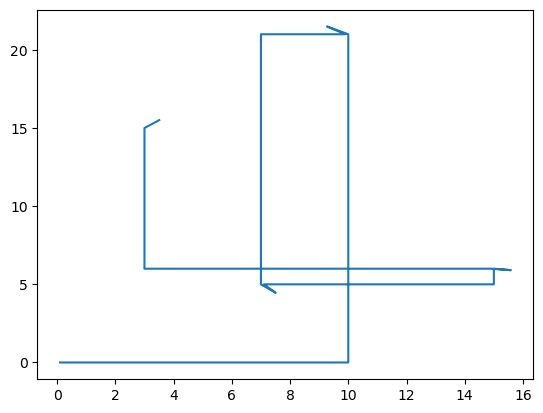

In [2]:
import matplotlib.pyplot as plt
x=[i[1] for i in person.full_path]
y=[i[2] for i in person.full_path]
plt.plot(x,y)
plt.show()

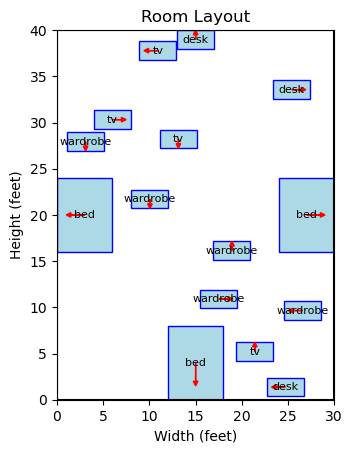

In [3]:
import matplotlib.pyplot as plt
import random

ROOM_WIDTH = 30
ROOM_HEIGHT = 40

# Furniture dimensions
FURNITURE_SIZES = {
    "bed": (6, 8),
    "desk": (4, 2),
    "tv": (4, 2),
    "wardrobe": (4, 2)
}

class Furniture:
    def __init__(self, name, x, y, width, height, orientation):
        self.name = name
        self.x = x
        self.y = y
        self.width = width
        self.height = height
        self.orientation = orientation
        self.interact_position = self.get_interact_position()

    def get_interact_position(self):
        if self.orientation == 0:
            return (self.x, self.y - self.height // 2)
        elif self.orientation == 90:
            return (self.x + self.width // 2, self.y)
        elif self.orientation == 180:
            return (self.x, self.y + self.height // 2)
        else:
            return (self.x - self.width // 2, self.y)

def generate_room_layout(furniture_counts):
    furniture_list = []
    wall_positions = [
        (0, ROOM_HEIGHT / 2),
        (ROOM_WIDTH, ROOM_HEIGHT / 2),
        (ROOM_WIDTH / 2, 0),
        (ROOM_WIDTH / 2, ROOM_HEIGHT)
    ]
    orientations = [270, 90, 0, 180]

    for name, count in furniture_counts.items():
        width, height = FURNITURE_SIZES[name]
        for i in range(count):
            wall_index = len(furniture_list) % len(wall_positions)
            x, y = wall_positions[wall_index]
            orientation = orientations[wall_index]
            if orientation == 0:
                y += height / 2
            elif orientation == 180:
                y -= height / 2
            elif orientation == 90:
                x -= width / 2
            elif orientation == 270:
                x += width / 2
            x = min(max(x, width / 2), ROOM_WIDTH - width / 2)
            y = min(max(y, height / 2), ROOM_HEIGHT - height / 2)
            overlap = True
            attempts = 0
            while overlap and attempts < 100:
                overlap = False
                for other in furniture_list:
                    if (abs(other.x - x) < (other.width + width) / 2) and (abs(other.y - y) < (other.height + height) / 2):
                        overlap = True
                        x = random.uniform(width / 2, ROOM_WIDTH - width / 2)
                        y = random.uniform(height / 2, ROOM_HEIGHT - height / 2)
                        break
                attempts += 1
            furniture = Furniture(name, x, y, width, height, orientation)
            furniture_list.append(furniture)

    return furniture_list

def plot_room_layout(furniture_list):
    fig, ax = plt.subplots()
    ax.set_xlim(0, ROOM_WIDTH)
    ax.set_ylim(0, ROOM_HEIGHT)
    ax.set_aspect('equal')
    ax.set_title("Room Layout")
    ax.set_xlabel("Width (feet)")
    ax.set_ylabel("Height (feet)")

    ax.plot([0, ROOM_WIDTH, ROOM_WIDTH, 0, 0], [0, 0, ROOM_HEIGHT, ROOM_HEIGHT, 0], color='black')

    for furniture in furniture_list:
        x, y = furniture.x, furniture.y
        width, height = furniture.width, furniture.height
        rect = plt.Rectangle((x - width / 2, y - height / 2), width, height, edgecolor='blue', facecolor='lightblue', label=furniture.name)
        ax.add_patch(rect)
        ax.text(x, y, furniture.name, ha='center', va='center', fontsize=8, color='black')

        if furniture.orientation == 0:
            ax.arrow(x, y, 0, -height / 4, head_width=0.5, head_length=0.5, fc='red', ec='red')
        elif furniture.orientation == 90:
            ax.arrow(x, y, width / 4, 0, head_width=0.5, head_length=0.5, fc='red', ec='red')
        elif furniture.orientation == 180:
            ax.arrow(x, y, 0, height / 4, head_width=0.5, head_length=0.5, fc='red', ec='red')
        elif furniture.orientation == 270:
            ax.arrow(x, y, -width / 4, 0, head_width=0.5, head_length=0.5, fc='red', ec='red')

    plt.show()

furniture_counts = {
    "bed": 3,
    "desk": 3,
    "tv": 4,
    "wardrobe": 5
}
furniture_list = generate_room_layout(furniture_counts)
plot_room_layout(furniture_list)
